# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the average GDP in these nations?
+ Which country has experienced the fastest increase in life expectancy over time?
+ What is the distribution of that life expectancy?
+ Is there a time lag between GDP growth and improvements in life expectancy?
+ Which country shows the largest fluctuation in life expectancy or GDP over time?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Python Modules

First and foremost, import the preliminary modules that will be necessary for the project:

In [40]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the Data

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here **all_data.csv** will be read in into a DataFrame called `df`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.

In [5]:
df = pd.read_csv('all_data.csv')

print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [6]:
print(len(df))

96


The previous codes and observations tells us this dataset has **96 rows** and **4 columns**: ***Country*, *Year*, *Life Expectancy at Birth (Years)*, *GDP*** 

## Exploring the Data

In [8]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Let's take a look at the countries that we're exploring! There are 6 of them in the dataset, and they are **Chile, China, Germany, Mexico, USA,** and **Zimbabwe**.

In [10]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We're examining the GDP of the 6 countries from the year **2000 to 2015**!

### Syncing column names

Upon reviewing the data, it is apparent that the column names are inconsistent. For instance, the column names in the first two are one word each, but the third is five words long! The descriptive `Life Expectency at Birth (Years)` will be useful for identifying the axis, but it will be a little tricky to code the plot itself. The column name is changed to `LEABY` using the `rename` method.

In [11]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Exploratory Plots

Plotting data can often be a far more effective way to explore the data; the `GDP` distribution is displayed here. The majority of the values in the data's `GDP` distribution are on the left side, indicating a strong right skewness. 


Text(0.5, 9.444444444444438, 'GDP in Trillions of U.S. Dollars')

<Figure size 1000x1000 with 0 Axes>

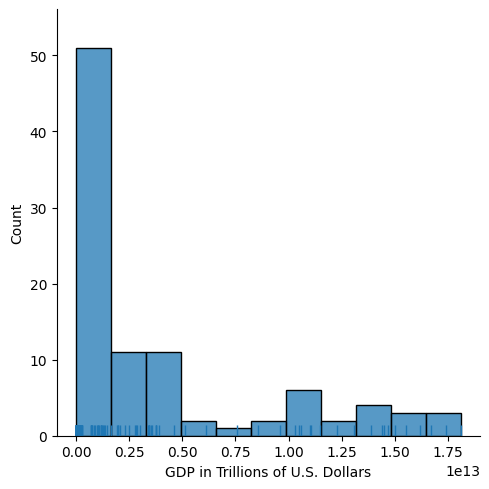

In [19]:
plt.figure(figsize = (10, 10))
sns.displot(df.GDP, rug = 1, kde = 0)
plt.xlabel("GDP in Trillions of U.S. Dollars")

Next the distribution of `LEABY` was examined. The distribution of `LEABY` in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` column. A further look might also identify different modes or smaller groupings of distributions within the range. 

Text(0.5, 9.444444444444438, 'Life Expectency at Birth (Years)')

<Figure size 1000x1000 with 0 Axes>

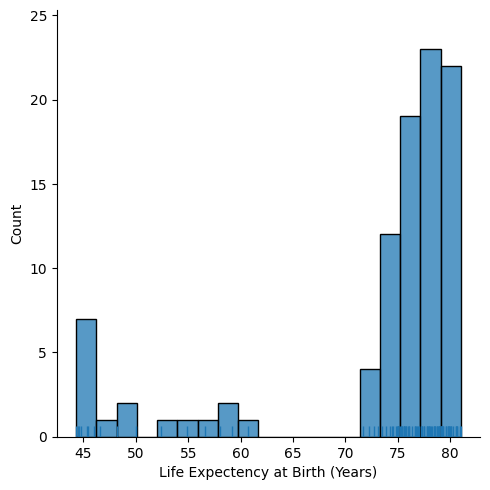

In [21]:
plt.figure(figsize = (10, 10))
sns.displot(df.LEABY, rug = 1, kde = 0)
plt.xlabel('Life Expectency at Birth (Years)')

Finding the average `LEABY` and `GDP` by country will be the next job, given the previous graphs did not divide the data by countries.

In [25]:
df_means = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

print(df_means.head(6))

                    Country     LEABY           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


Bar graphs displaying the mean values for each variable are made below, once they are divided by `Country` and the average values for `LEABY` and `GDP` are established. 

With the exception of Zimbabwe, all the countries in the first plot have life expectancy numbers in the mid-to-high seventies. This likely clarifies the previous distribution's skew!

Text(0.5, 0, 'Country')

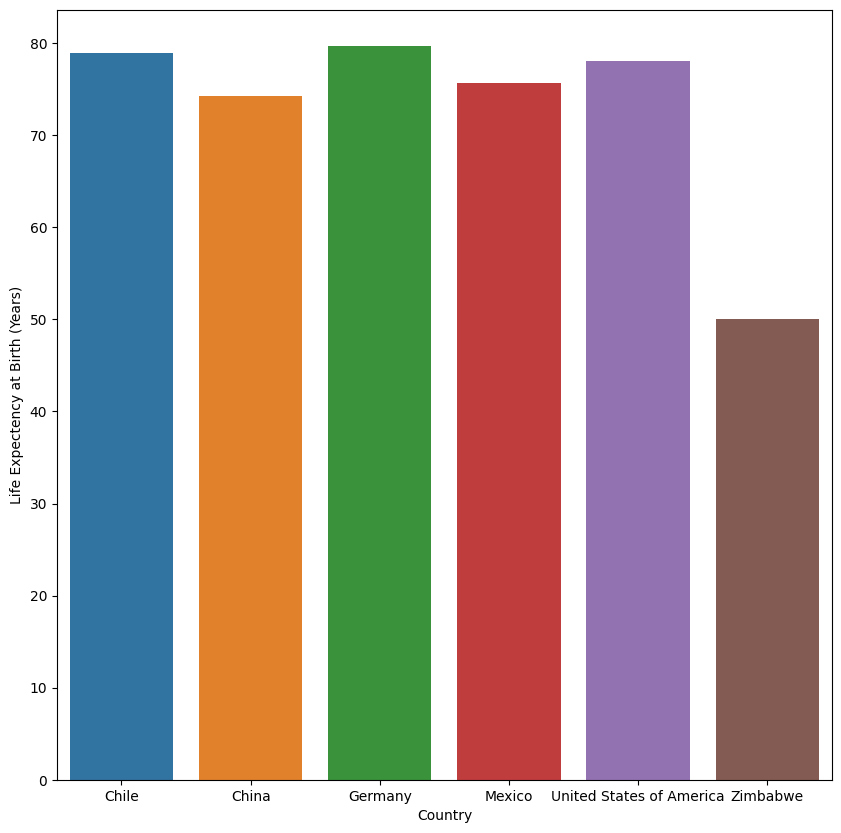

In [73]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Country', y = 'LEABY', data = df_means, hue = 'Country')
plt.ylabel("Life Expectency at Birth (Years)")
plt.xlabel("Country")

It appears that the US has a substantially greater average `GDP` by `Country` than the other countries. Zimbabwe is almost hidden in this bar plot, while Chile is very dimly visible. In contrast, the `GDP` of the United States of America is enormous. Mexico, Germany, and China appear to have comparable numbers.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

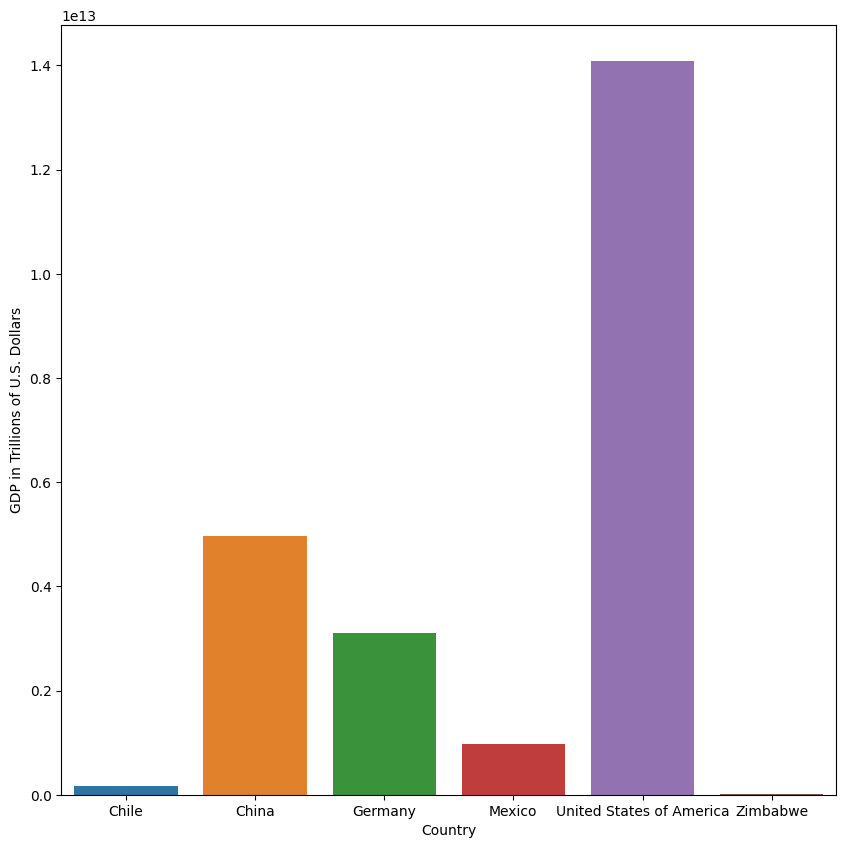

In [74]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Country', y = 'GDP', data = df_means, hue = 'Country')
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of U.S. Dollars')

### Violin Plots

Examining the distributions of each and searching for trends in the shapes is another method of comparing data.

In contrast to the box plot, the violin plot is a popular option since it may display the distribution's form. The distribution of the numerical columns, `GDP` and `LEABY`, is on the y axis, and the country is on the x axis below. 

Zimbabwe, Chile, and Mexico have smaller ranges in the `GDP` plot on the left, but China and the US have quite large ranges. 

With the exception of Zimbabwe, whose range extends from the high 30s to the high 60s, many of the countries in the `LEABY` plot have shorter ranges.


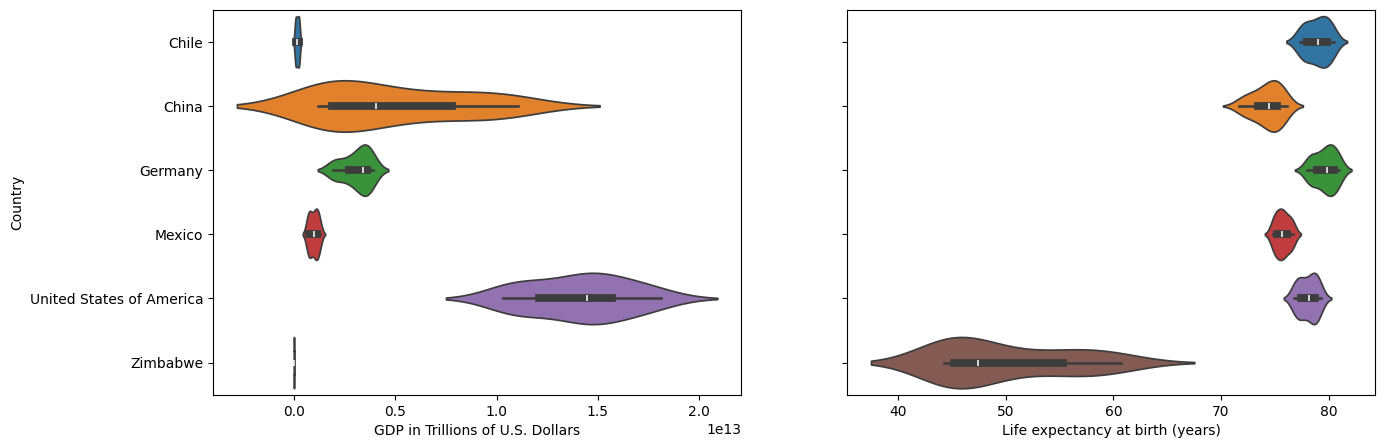

In [77]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, hue = df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, hue = df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

### Swarm Plots

Swarm plots are a more recent technique for displaying distributions and can be used in conjunction with box and violin plots. A violin plot is displayed first, followed by the stand-alone swarm plot. Swarm plots are helpful because they display the distribution through area/shape and the dot density surrounding the values. 

In the `GDP` figure on the left, the amount of data points that lie around the values of Chile and Zimbabwe is represented by a vertical line of dots. With a box plot, this detail would have been lost unless the reader is a very skilled data visualizer. 


Text(0.5, 25.722222222222214, 'Life expectancy at birth (years)')

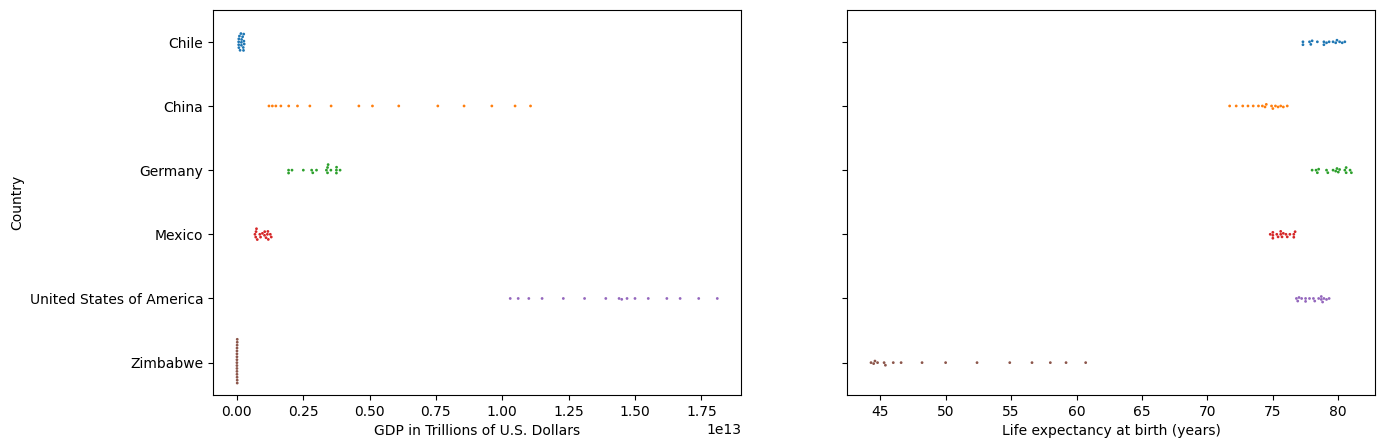

In [78]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, size = 2, hue = df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country, size = 2, hue = df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)")

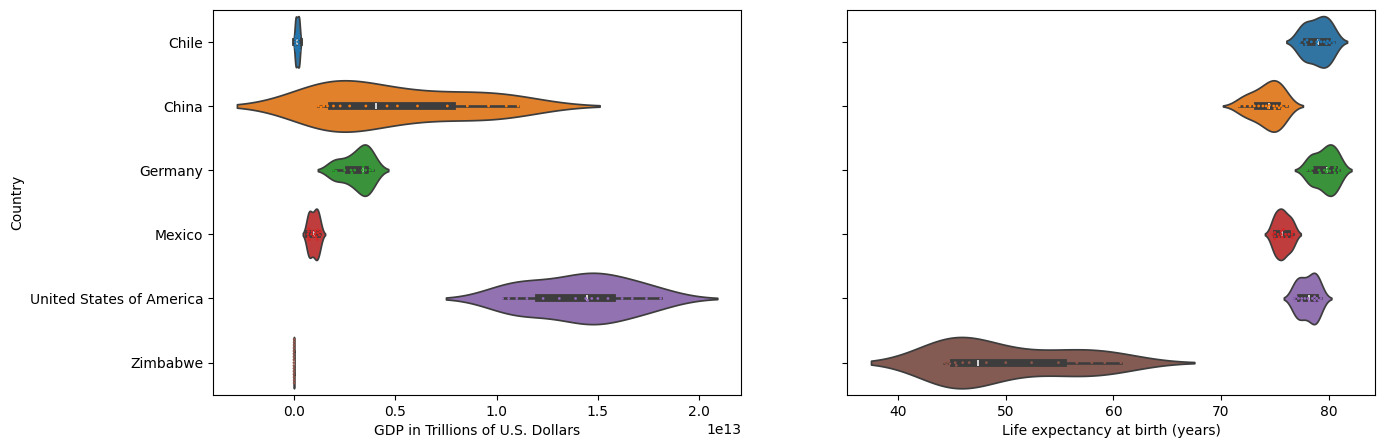

In [80]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, hue = df.Country)
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, size = 2, hue = df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, hue = df.Country)
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country, size = 2, hue = df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

### Line Charts

Next, using line charts, the data will examine `GDP` and `LEABY` over time. The countries are colored-separated below, and it is evident that both China and the US had significant increases between 2000 and 2015. In that time, China's GDP increased from less than a quarter trillion to one trillion dollars. This level of rise was not observed in the other countries.


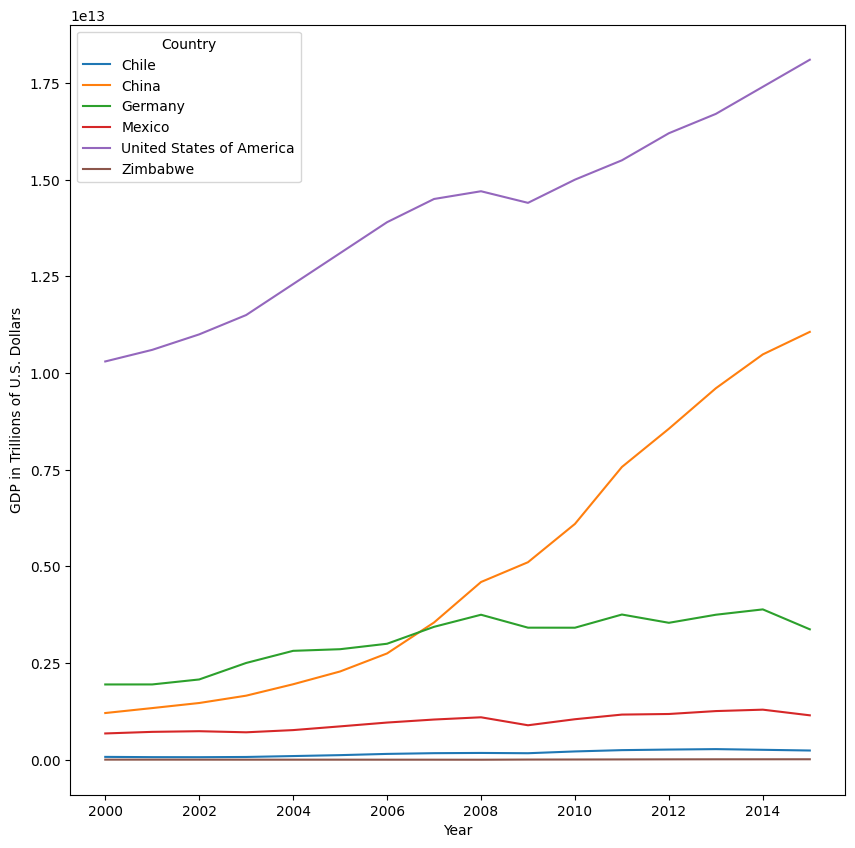

In [60]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = df.Year, y = df.GDP, hue = df.Country)
plt.ylabel("GDP in Trillions of U.S. Dollars");

The faceted line charts by Country were another area that was examined in further detail. Since each nation has a unique y axis in the separate plots, comparing the `GDP` shapes across time without using the same scale is made simpler. It is simpler to observe that increases have occurred in every country with this strategy. Although the `GDP` growth of the other country appears to be less than that of China and the US in the above figure, all of the countries did saw increase starting in 2000.

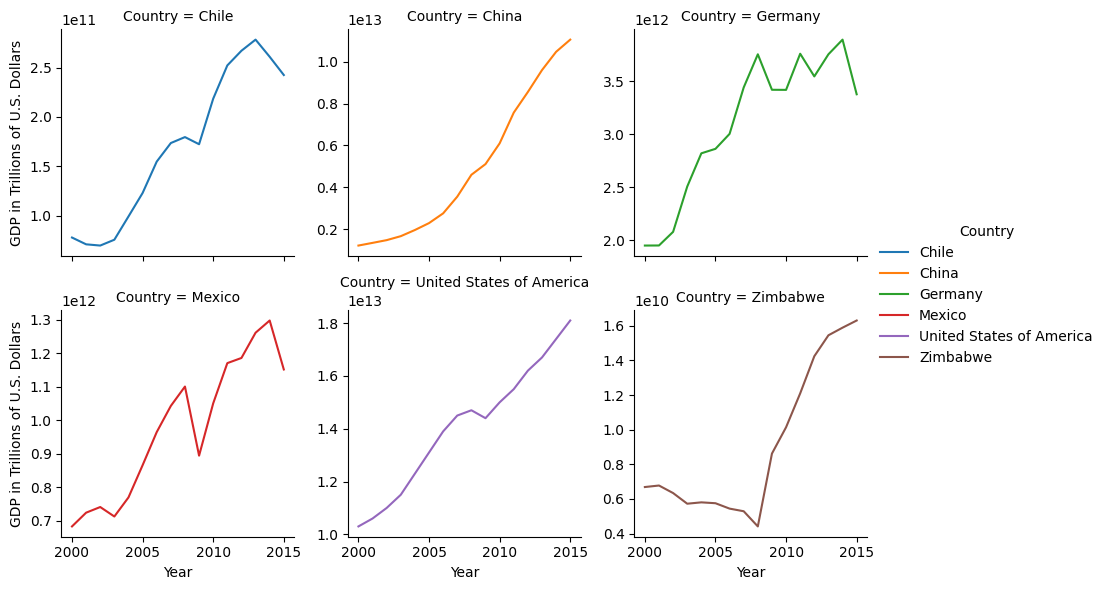

In [63]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

The `life expectancy` throughout `the years` is depicted in the chart below. The graph indicates that `life expectancy` has increased in all countries, with Zimbabwe experiencing the biggest gain following a slight decline in 2004.

Text(0, 0.5, 'Life Expectency at Birth (Years)')

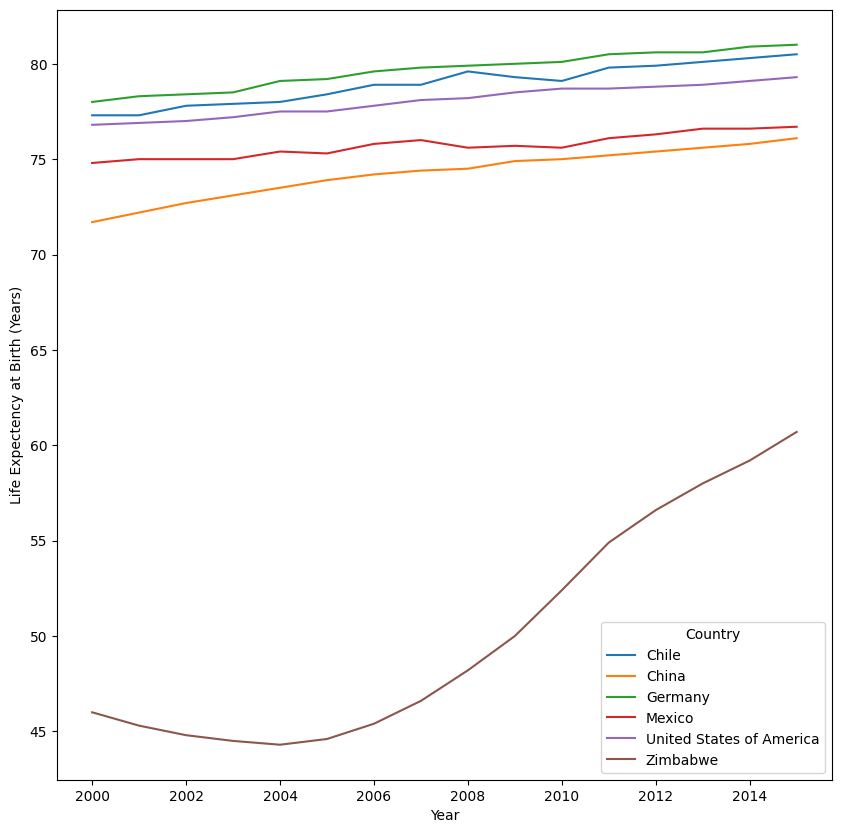

In [64]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = df.Year, y = df.LEABY, hue = df.Country)
plt.ylabel('Life Expectency at Birth (Years)')

The plot below shows `life expectancy by country`, much as the previous breakdown of `GDP by nation`. It is evident that `life expectancy` in Mexico and Chile appeared to decline at about the same time, and this may be investigated further. Since many of these subtleties were lost when the y axis was shared by the `countries`, this kind of plotting is helpful. Furthermore, for many `countries`, the ostensibly straight adjustments were not as seamless as they appeared.

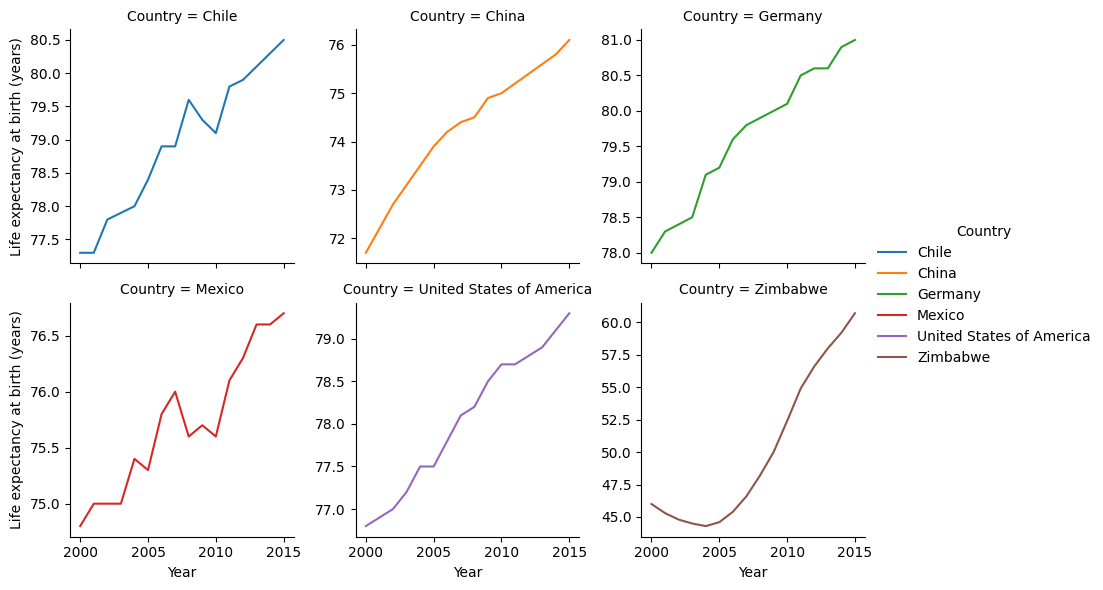

In [65]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY").add_legend().set_axis_labels("Year","Life expectancy at birth (years)"))

### Scatter Plots

We shall examine the relationship between `GDP` and `LEABY` in the next two charts. The graph below appears to be similar to earlier ones showing Zimbabwe's `GDP` being constant while the country's `life expectancy` is rising. In the other nations, `life expectancy` appears to increase in tandem with `GDP` growth. The `GDP`-`life expectancy` relationship appears to have relatively comparable slopes in the US and China.

Text(0.5, 0, 'Life Expectency at Birth (Years)')

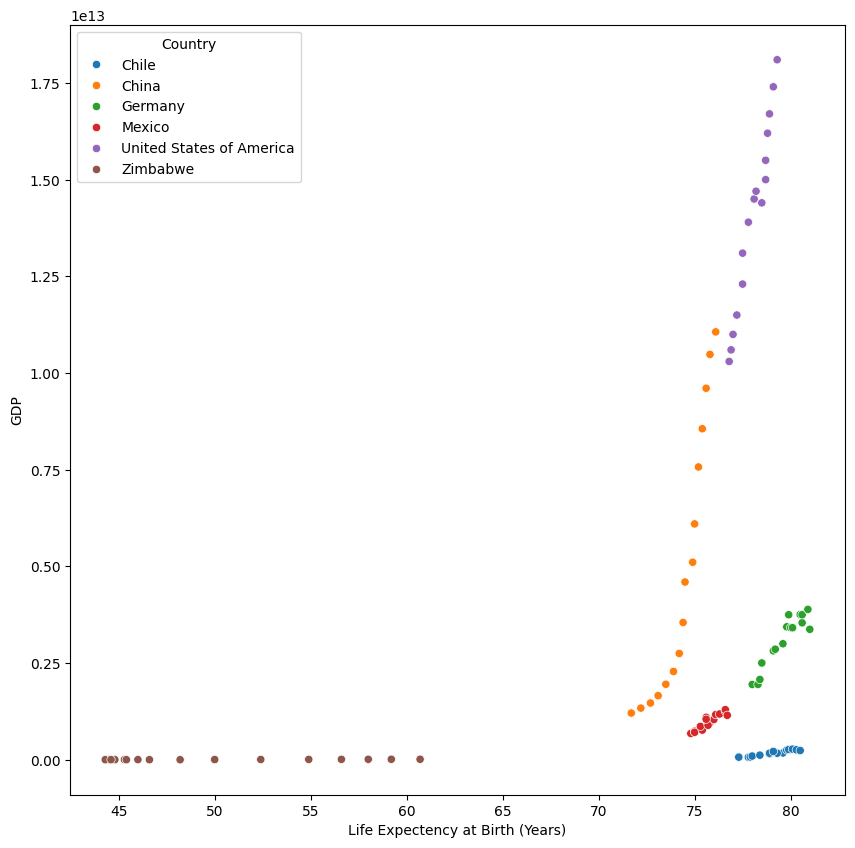

In [71]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = df.LEABY, y = df.GDP, hue=df.Country)
plt.xlabel('Life Expectency at Birth (Years)')

Each scatter plot has facets that divide up the countries, much like in the preceding plots. When examining individual nations, the GDP and life expectancy of most, including the US, Mexico, and Zimbabwe, have linear correlations. China's curve is somewhat exponential, while Chile's appears to be rather logarithmic. Generally speaking, however, life expectancy and GDP are rising and show a positive link.

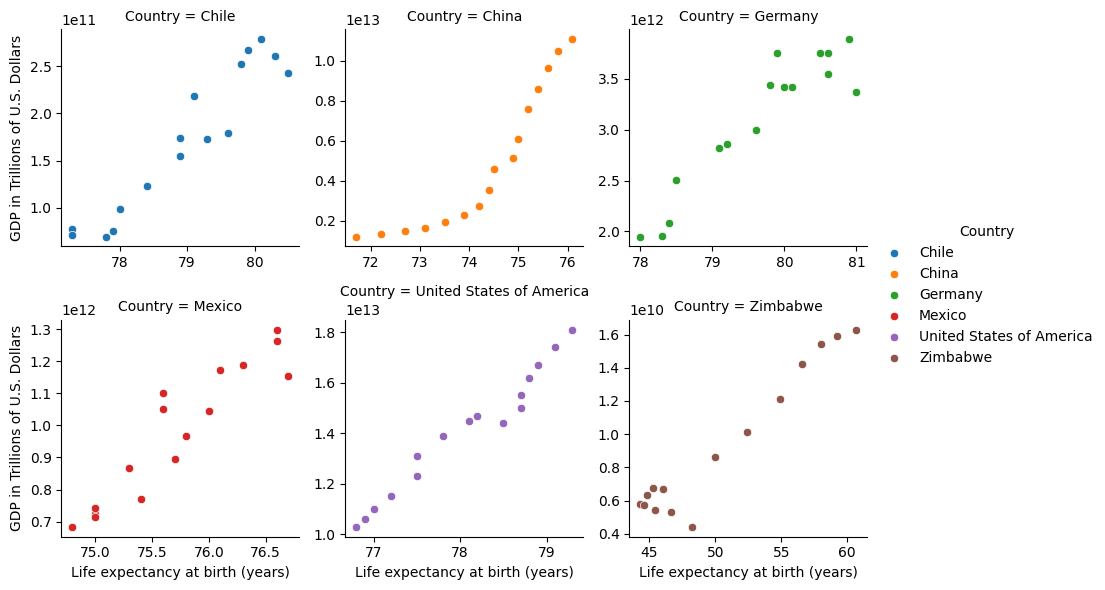

In [72]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False, sharex = False)

graph = (graph.map(sns.scatterplot,"LEABY", "GDP").add_legend().set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

## Conclusions

Despite the fact that there were only 96 rows and 4 columns in the data, this project was still able to create a significant number of data visualizations. 

Additionally, the project was able to respond to a few of the initial queries:

+ Has life expectancy increased over time in the six nations?
    + (Line charts) Yes, with Zimbabwe having some downs at the early years, it still has the biggest increase. 
+ Has GDP increased over time in the six nations?
    + (Line charts) Yes, all countries have their GDP increased, with China rising the strongest, while others fluctuate in its journey.
+ Is there a correlation between GDP and life expectancy of a country?
    + (Scatter plots) Yes, every country has its life expectancy correlates with GDP.
+ What is the average life expectancy in these nations?
    + (Bar plot using df_means) The average life expectancy for most of the countries was mid to high 70s, while Zimbabwe has an average of 50 years.
+ What is the average GDP in these nations?
    + (Bar plot using df_means) The USA has an average of 1.4 trillion US dollars for GDP, 0.5 trillion, 0.3 trillion, 0.1 trillion dollars for China, Germany, Mexico. Chile and Zimbabwe have their GDP so low that it barely shows on the plot.
+ Which country has experienced the fastest increase in life expectancy over time?
    + (Line charts) Zimbabwe, with a jump from about 47 to 60, a 13-year difference, within 15 years.
+ What is the distribution of that life expectancy?
    + (Distribution plots) The life expectancy had a left skew, or most of the observations were on the right side.
+ Is there a time lag between GDP growth and improvements in life expectancy?
    + (Scatter plots) No, since each country has its life expectancy rises when its GDP increases.
+ Which country shows the largest fluctuation in life expectancy or GDP over time?
    + (Line charts) About life expectancy, Zimbabwe has increased 13 years in life expectency in just 15 years. About GDP, B has increased nearly 1 trillion US dollars in 15 years.

## Further Research

The goal of the study was to investigate the events that occurred in China over the previous ten years that led to such a sharp rise in GDP.

This [Forbes article](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/#40869ba53f13) explains how China's massive population, readily accessible money, and efficient manufacturing have allowed for GDP growth in recent decades that has not been equaled. The analysis can determine whether the data's conclusions and China's GDP growth in real life agree.